# LVM Data Simulator tutorial: 2D simulations


**This is a tutorial on how run the simulator to produce 2D Raw spectra in the same format as they will be obtained with LVM. This is developed mainly for DRP tests.**
- How to install the simulator and how to prepare a custom simulation is shown in [tutorial #1](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial1.ipynb)
- More details on the setup of LVM instrumentation and on the structure of the outputs of the simulator are given in [tutorial #2](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial2.ipynb)
- More realistic and useful simulations are considered in [tutorial #3](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial3.ipynb) - please go there if you have already installed and configured the package and want to learn how to simulate the source field in more details.
- If you want to learn how to use the code as exposure time calculator (ETC) - please go there [tutorial #4](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial4.ipynb).

_Last update: 2022/11/21_

**Note: This tutorial is in preparation!!! Don't trust it too much :)**

In [1]:
from lvmdatasimulator.simulator2d import Simulator2D
from lvmdatasimulator.field import LVMField
from lvmdatasimulator.observation import Observation
from lvmdatasimulator.telescope import LVM160
from lvmdatasimulator.instrument import LVMSpectrograph
from lvmdatasimulator.fibers import FiberBundle

import astropy.units as u
from astropy.io import fits
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch, LinearStretch
from matplotlib import pyplot as plt
import os

In [2]:
os.chdir("/Users/mors/Science/LVM/Sim2D/")

In [3]:
tel = LVM160()
spec = LVMSpectrograph()
# we moderately limit the number of fibers to speed up the calculations.
bundle = FiberBundle(bundle_name='full', nrings=12)

ra = 12.34 # u.degree
dec = -20.35 # u.degree
fov_size = 35 # u.arcmin
fov_pixel = 5 # u.arcsec
distance = 50 # * u.kpc
turbulent_sigma = 20 #* u.km / u.s

[WARNING]: nrings is defined. It will limit the number of fibers selected.
[INFO]: Using the full hexagon pattern
[INFO]: Using the inner 12 hexagonal rings.


In [4]:
name = 'LVM_2D_test'
my_lvmfield = LVMField(ra=ra, dec=dec, size=fov_size, pxsize=fov_pixel, name=name,
                       ism_params={'distance': distance, 'turbulent_sigma': turbulent_sigma,})
my_lvmfield.generate_gaia_stars(gmag_limit=15)
dig = {"type": 'DIG', 'max_brightness': 5e-16, 'perturb_amplitude': 0.2, 'perturb_scale': 500 * u.pc}
bubble = {'type': 'Bubble', 'max_brightness': 1e-14, 'radius': 40, 'expansion_velocity':35, 'thickness':0.2, 'sys_velocity': 40,
          'model_params': {'Z': 0.8, 'qH': 51., 'nH': 10}, 'model_type': 'cloudy', 'offset_X': 0, 'offset_Y':0}

my_lvmfield.add_nebulae([dig, bubble])

[INFO]: 719 Gaia stars in the field
[INFO]: 685 stars are fainter than 15 and have been rejected
[INFO]: Transforming world coordinates to pixel coordinates
[INFO]: Associating spectra to stars using library pollux_resampled_v0.fits...


INFO: Query finished. [astroquery.utils.tap.core]


[INFO]: Rescaling 34 synthetic spectra.
[INFO]: Saving star list to: ./LVM_2D_test/LVM_2D_test_starlist.fits.gz
[WARNING]: The file ././LVM_2D_test/LVM_2D_test_starlist.fits.gz already exist and it will be overwritten


[INFO]: Start generating 2 nebulae
[WARNING]: No model ids or model parameters are set for the nebula #0: use default cloudy 'model_id=Cloud_366'
[WARNING]: Use the closest pre-computed model with id = Cloud_289


[WARNING]: Bundle center coords are not defined, using the coords of the field.


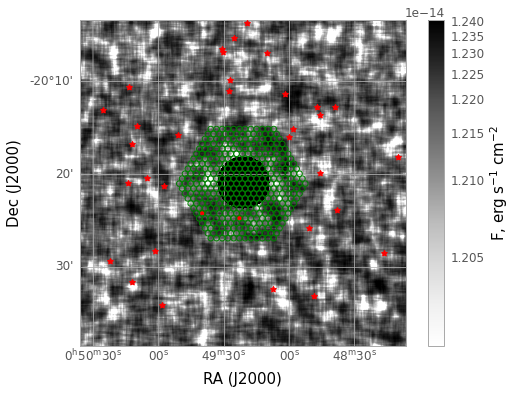

In [5]:
my_lvmfield.show(cmap=plt.cm.Greys, percentile=96, fibers=bundle.fibers_science)

In [6]:
exptimes = [900] # in seconds
obs = Observation(ra=ra, dec=dec, unit_ra=u.deg, unit_dec=u.deg, exptimes=exptimes)
sim = Simulator2D(my_lvmfield, obs, spec, bundle, tel)

In [7]:
sim.simulate_science()

[INFO]: Recovering target spectra for 397 fibers.
[INFO]: Start extracting nebular spectra
[INFO]: Reading the atmospheric extinction from file.
[INFO]: Simulating the sky emission 2 days from new moon.
[INFO]: Using sky file: /Users/mors/Science/PyWorkspace/lvmdatasimulator/data/sky/LVM_LVM160_SKY_2.dat
[INFO]: Resample sky emission to instrument wavelength solution.
[INFO]: Generating standard stars
[INFO]: Standard star 1 with Teff 5750, Gmag 8.20 added.
[INFO]: Standard star 2 with Teff 5750, Gmag 8.40 added.
[INFO]: Standard star 3 with Teff 6500, Gmag 8.80 added.
[INFO]: Standard star 4 with Teff 6500, Gmag 6.30 added.
[INFO]: Standard star 5 with Teff 5750, Gmag 5.20 added.
[INFO]: Standard star 6 with Teff 5750, Gmag 6.70 added.
[INFO]: Standard star 7 with Teff 6000, Gmag 5.50 added.
[INFO]: Standard star 8 with Teff 6500, Gmag 5.40 added.
[INFO]: Standard star 9 with Teff 5750, Gmag 7.40 added.
[INFO]: Standard star 10 with Teff 5750, Gmag 8.90 added.
[INFO]: Standard star 11

[INFO]: Saving science exposures with 900s exposures and 10s of exposure for each standard star
[INFO]: Project the spectra of camera #1 and blue channel onto CCD
100%|██████████| 180/180 [06:35<00:00,  2.20s/it]
[INFO]: Done for camera #1 and blue branch
[INFO]: Project the spectra of camera #1 and red channel onto CCD
100%|██████████| 180/180 [07:00<00:00,  2.33s/it]
[INFO]: Done for camera #1 and red branch
[INFO]: Project the spectra of camera #1 and ir channel onto CCD
100%|██████████| 180/180 [06:18<00:00,  2.10s/it]
[INFO]: Done for camera #1 and ir branch
